# **Lab 10**

In [51]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab 10/spambase.data',header=None)
df.iloc[:,:] = preprocessing.MinMaxScaler().fit_transform(df)


Y = df.iloc[:,-1]
X = df.iloc[:,:-1]


X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.3, stratify=Y, random_state=30)

# sc_X = preprocessing.StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.fit_transform(X_test)

df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487,1.0
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836,1.0
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551,1.0
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995,1.0
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.068282,0.000000,0.121569,0.0,0.000,0.052721,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.023790,0.0,0.000000,0.000000,0.000000,0.000129,0.000200,0.005492,0.0
4597,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.010869,0.000000,0.000000,0.000504,0.000300,0.000821,0.0
4598,0.066079,0.000000,0.058824,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.023261,0.073626,0.0,0.000000,0.000000,0.000000,0.000367,0.000501,0.007386,0.0
4599,0.211454,0.000000,0.000000,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005845,0.0,0.000000,0.000000,0.000000,0.000133,0.000400,0.004861,0.0


In [52]:
X_train.shape

(3220, 57)

In [97]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

models = ['Linear Kernel SVM', 'Quadratic Kernel SVM', 'RBF Kernel SVM']
max_accs = []
optim_c = []

plot_data = {}

for i, clf in enumerate(models):
    training_accs = []
    testing_accs = []
    data_test = {}
    data_train = {}
    acc_max = 0
    cval = 0
    for j in range(1,21):
        classifier_linear = LinearSVC(C = j, random_state = 55)
        classifier_quad = SVC(C = j, random_state = 55, kernel = 'poly', degree=2)
        classifier_rbf = SVC(C = j, random_state = 55)

        classifiers = [classifier_linear, classifier_quad, classifier_rbf]
        classifiers[i].fit(X_train, Y_train)

        Y_Pred = classifiers[i].predict(X_test)
        pred_train = classifiers[i].predict(X_train)

        acc_train, acc_test = metrics.accuracy_score(Y_train, pred_train), metrics.accuracy_score(Y_test, Y_Pred)
        data_train[j] = round(acc_train,4)
        data_test[j] = round(acc_test,4)

        if acc_test>acc_max:
            acc_max = acc_test
            cval = j

    max_accs.append(acc_max)
    optim_c.append(cval)

    plot_data[clf] = [data_train, data_test]

In [99]:
print("Metrics for SVM with different Kernels :\n")
for i, clf in enumerate(models):
    print(clf)
    print(f"Max Testing Accuracy : {max_accs[i]:.4f}")
    print(f'C value : {optim_c[i]}')
    print()

Metrics for SVM with different Kernels :

Linear Kernel SVM
Max Testing Accuracy : 0.9312
C value : 15

Quadratic Kernel SVM
Max Testing Accuracy : 0.9298
C value : 20

RBF Kernel SVM
Max Testing Accuracy : 0.9464
C value : 5



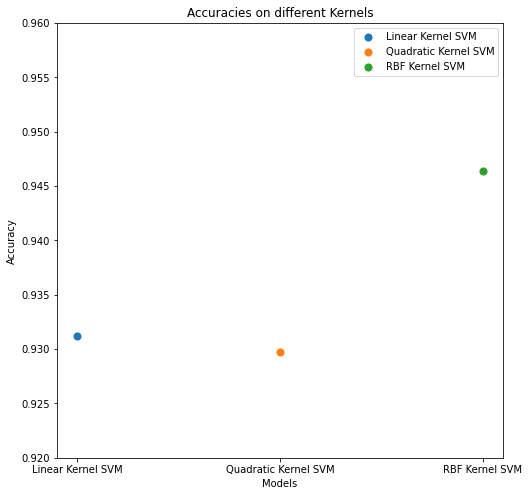

In [96]:
plt.figure(figsize=(8,8))
plt.title('Accuracies on different Kernels')
for i, clf in enumerate(models):
    plt.scatter([clf], max_accs[i], label=clf, s=50)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0.92,0.96)
plt.show()

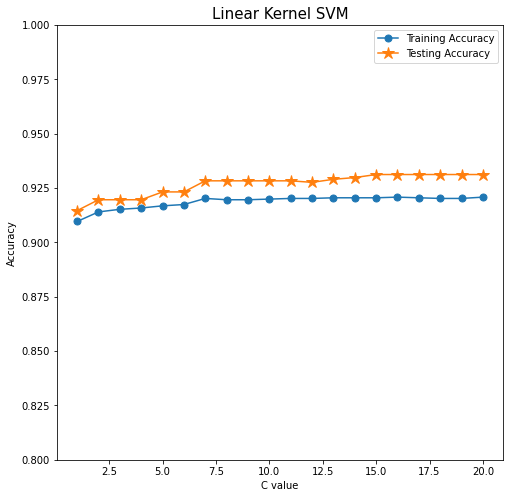

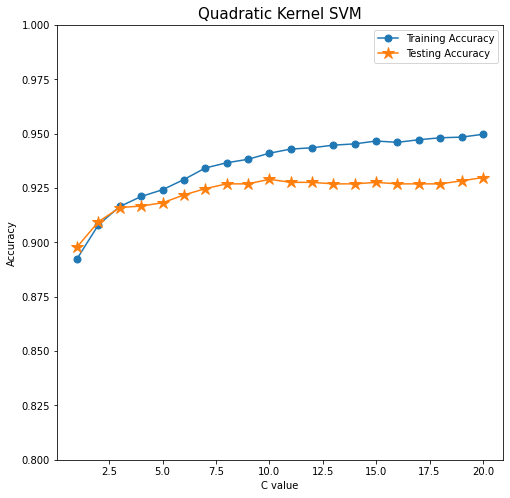

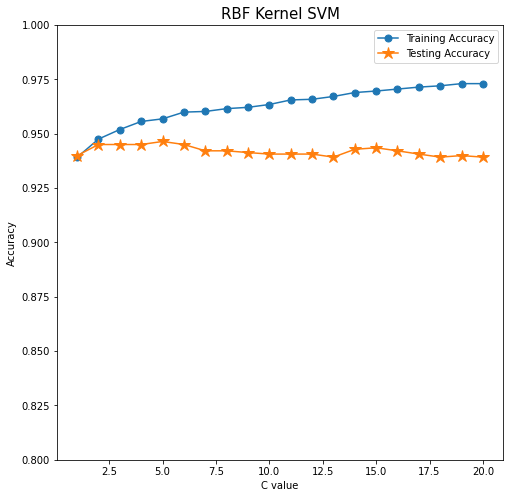

In [90]:
metrics_c = pd.DataFrame({'C value':range(1,21)})

for i in plot_data:
    plt.figure(figsize=(8,8))
    plt.title(i,fontsize=15)
    train_data = plot_data[i][0]
    X = [x for x in train_data]
    Y = [train_data[y] for y in train_data]
    plt.plot(X, Y, label = 'Training Accuracy', markersize=7, marker='o')

    test_data = plot_data[i][1]
    X = [x for x in test_data]
    Y = [test_data[y] for y in test_data]

    metrics_c = pd.concat([metrics_c,pd.Series(Y)],axis=1)

    plt.plot(X, Y, label = 'Testing Accuracy', markersize=12, marker='*')
    plt.legend()
    plt.ylim(0.8,1)
    plt.ylabel('Accuracy')
    plt.xlabel('C value')
    plt.show()

In [92]:
metrics_c.columns = ['C value']+models
metrics_c

,C value,Linear Kernel SVM,Quadratic Kernel SVM,RBF Kernel SVM
0,1,0.9146,0.8979,0.9399
1,2,0.9196,0.9095,0.9450
2,3,0.9196,0.9160,0.9450
3,4,0.9196,0.9167,0.9450
4,5,0.9232,0.9182,0.9464
5,6,0.9232,0.9218,0.9450
6,7,0.9283,0.9247,0.9421
7,8,0.9283,0.9269,0.9421
8,9,0.9283,0.9269,0.9413
9,10,0.9283,0.9290,0.9406


In [38]:
df = pd.DataFrame({'Models':models,'Training Accuracy':training_accs, 'Testing Accuracy': testing_accs})
df

,Models,Training Accuracy,Testing Accuracy
0,Linear Kernel SVM,0.9227,0.9319
1,Quadratic Kernel SVM,0.8556,0.8327
2,RBF Kernel SVM,0.9441,0.9442


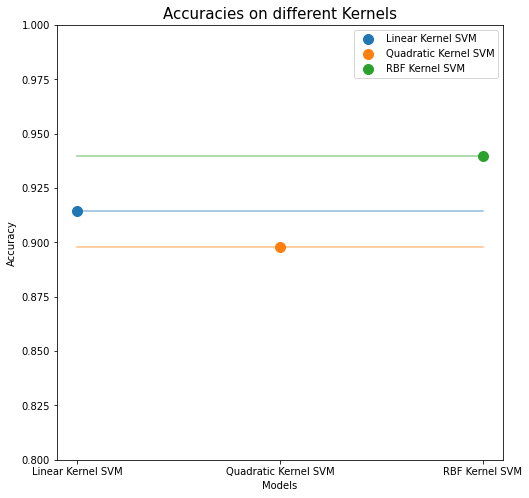

In [54]:
plt.figure(figsize=(8,8))
plt.title('Accuracies on different Kernels', fontsize=15)
for i, clf in enumerate(models):
    plt.scatter([clf], testing_accs[i], label=clf, s=100)
    plt.plot(models, [testing_accs[i], testing_accs[i], testing_accs[i]], alpha=0.5)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0.8,1)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


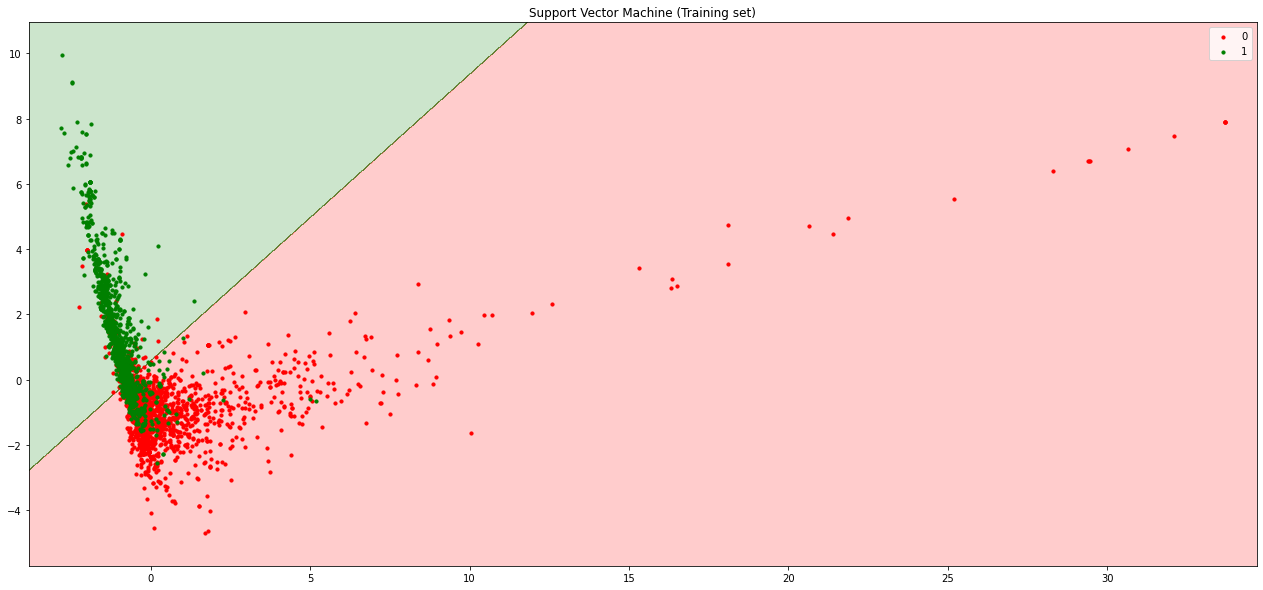

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


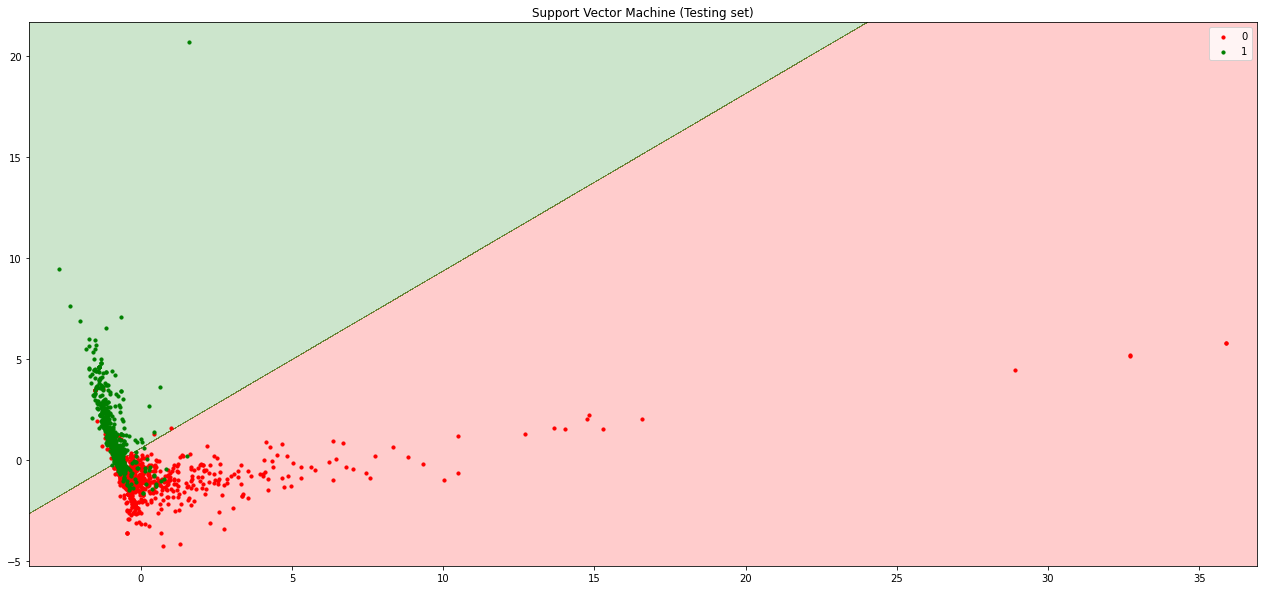

In [24]:
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

X_Set, Y_Set = PCA(2).fit_transform(X_train) , Y_train
X_Set_test, Y_Set_test = PCA(2).fit_transform(X_test) , Y_test

classifier = LinearSVC(C = 8, random_state = 55)
classifier.fit(X_Set, Y_Set)

X1, X2 = np.meshgrid(np.arange(start = min(X_Set.min(), Y_Set.min()) - 1, stop = max(X_Set.max(), Y_Set.min()) + 1, step = 0.01),
                     np.arange(start = min(X_Set.min(), Y_Set.min()) - 1, stop = max(X_Set.max(), Y_Set.min()) + 1, step = 0.01))

plt.figure(figsize=(22,10))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.2, cmap = ListedColormap(('red', 'green')))

plt.xlim(X_Set[: , 0].min()-1, X_Set[: , 0].max()+1)
plt.ylim(X_Set[: , 1].min()-1, X_Set[: , 1].max()+1)

for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],c = ListedColormap(('red', 'green'))(i), label = j, s=10)
    
plt.title('Support Vector Machine (Training set)')
plt.legend()
plt.show()


X1, X2 = np.meshgrid(np.arange(start = min(X_Set_test.min(), Y_Set_test.min()) - 1, stop = max(X_Set_test.max(), Y_Set_test.min()) + 1, step = 0.01),
                     np.arange(start = min(X_Set_test.min(), Y_Set_test.min()) - 1, stop = max(X_Set_test.max(), Y_Set_test.min()) + 1, step = 0.01))

plt.figure(figsize=(22,10))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.2, cmap = ListedColormap(('red', 'green')))

plt.xlim(X_Set_test[: , 0].min()-1, X_Set_test[: , 0].max()+1)
plt.ylim(X_Set_test[: , 1].min()-1, X_Set_test[: , 1].max()+1)

for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set_test[Y_Set_test == j, 0], X_Set_test[Y_Set_test == j, 1],c = ListedColormap(('red', 'green'))(i), label = j, s=10)
    
plt.title('Support Vector Machine (Testing set)')
plt.legend()
plt.show()